<a href="https://colab.research.google.com/github/mbaliu-treino/Desenvolve/blob/main/LEARN_C_NLP_analise_de_sentimento_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=orange><b>Linguagem Natural parte 1: NLP com análise de sentimento</b></font>

<ul><font size=2 color=gray>FICHA TÉCNICA
<li><a href=https://cursos.alura.com.br/course/introducao-a-nlp-com-analise-de-sentimento><font size=2 color=gray>Linguagem Natural parte 1: NLP com análise de sentimento</a>
<li>Carga Horária: 6 h
<li>Instrutora: Thiago G Santos
<!-- </ul> -->

<hr color=gray><br>
<h3><b>Conteúdo / Aprendizagem:</b></h3>

- Conceitos fundamentais do Processamento de Linguagem Natural.
    - Dados textuais: classificação e exploração.
    - O que é NLP?
- Análise de Sentimento de modo automatizado.
- Bag of Words: uma forma de vetorização (Sparse Matrix).
- Uma arquitetura para classificação de sentimentos.
    - Vetorização, treinamento, avaliação
- Visualizações de dados textuais (Word Clouds e Pareto).
- Tokenização
    - NLTK: uma das principais bibliotecas python para PLN (tokenização).
- Stop words
- Limpeza de stop words

# <font color=orange>RESUMO</font>

<a href=https://docs.google.com/spreadsheets/d/1tTygYlq9r7nkUsw9a25N5_z57-de_59tSBCIVPw6KUw><font size=2 color=gray>ROTEIROS Data Science</font></a>

* <font color=orange><b>Exploração das palavras</b></font>
* <font color=orange><b>Construção de modelo de classificação (supervisionada e não-supervisioanda)</b></font>
* <font color=orange><b>Tratamento do texto</b></font>


1. Obter dados do Kaggle via API
2. Obtenção do _Corpus_
3. Vetorização das frases (bags os words)
4. Treino e Teste, escolha do modelo de classificação para dados esparsos.


1. COnstrução de modelo, teste da performance, realização de tratamentos, novo teste ...

# <font color=orange>CURSO</font>

PLN é uma sub-área da inteligência artificial, uma área da ciência da computação, que se propõe a estudar a relação entre a linguagem humana (falada ou escrita) e a linguagem das máquina. Ou seja, como serão analisadas e processadas.

A Análise de Sentimento não se restringe somente a análise de textos, mas também pode ser análise das expressões faciais das pessoas, para entender qual imagem ela está transparecendo.

A Análise de Sentimento é um modelo de Machine Learning para analisar textos e classificá-lo de acordo do sentimento.



## Dados do Kaggle

In [ ]:
# Para o output do Colab quebre as linhas longas
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))

get_ipython().events.register('pre_run_cell', set_css)

In [ ]:
import pandas as pd

In [ ]:
# AMBIENTE PARA BAIXAR DADOS DO KAGGLE - exige o arquivo de API
!pip install -q kaggle
from google.colab import files
files.upload()
!rm -r ~/.kaggle  # remove any file
!mkdir ~/.kaggle  # remove any folder
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets list

Saving kaggle.json to kaggle.json
rm: cannot remove '/root/.kaggle': No such file or directory


In [ ]:
# BAIXA O ARQUIVO DO CURSO
!kaggle datasets download -d luisfredgs/imdb-ptbr

# DESCOMPACTAÇÃO DO ZIP
!mkdir ./data
!unzip imdb-ptbr.zip -d ./data

 72% 35.0M/48.4M [00:00<00:00, 41.4MB/s]
100% 48.4M/48.4M [00:00<00:00, 57.9MB/s]
Archive:  imdb-ptbr.zip
  inflating: ./data/imdb-reviews-pt-br.csv  


In [ ]:
uri = './data/imdb-reviews-pt-br.csv'
resenha = pd.read_csv(uri)
resenha.sample(5)

,id,text_en,text_pt,sentiment
24330,24332,"I saw Five Fingers at the Drive-In in...what, ...","Eu vi Five Fingers no Drive-In em ... o que, 1...",pos
26492,26494,Tenants Two writers struggle to complete their...,Inquilinos Dois escritores lutam para completa...,neg
31895,31897,"This self proclaimed ""very talented artist"" ha...","Este auto proclamado ""artista muito talentoso""...",neg
18807,18809,Theres no other word for it...Fox dumped this ...,Não há outra palavra para isso ... Fox despejo...,pos
809,810,"Honestly, Mr. Thalluri.... if you do a drama m...","Honestamente, Sr. Thalluri ... se você fizer u...",neg


# NLP

In [ ]:
from sklearn.model_selection import train_test_split

# X - matriz; y - classe de sentimento
X = resenha['text_pt']
y = resenha['sentiment']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    random_state=42
)

## Conhecer os dados

Aprendizagem supervisionada ou não-supervisiondo.

1. **Conhecer os Textos**: A primeira etapa a se fazer quando trabalhamos com dados textuais é entender alguns comportamentos dessesdados, se são textos curtos ou longos, se possuem uma formatação ou se são textos livres, se possuem algum indício para a classificação esperada, se é formal ou informal, se tem muito número ou não.

2. **Análise do Balanceamento**: avaliar se as classes estão balanceadas.

In [ ]:
# 1 - Conhecer os textos
print('Negativa \n')
print(resenha.loc[189, 'text_pt'])

Negativa 

Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.


In [ ]:
print('Positiva \n')
print(resenha.loc[49002, 'text_pt'])

Positiva 

Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo maio

In [ ]:
# Análise do Balanceamento
resenha['sentiment'].value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

In [ ]:
classificacao = resenha['sentiment'].replace(['neg', 'pos'], [0,1])
resenha['classificacao'] = classificacao
resenha.sample(5)

,id,text_en,text_pt,sentiment,classificacao
6756,6758,MST3K fodder. Its so bad its actually worth se...,MST3K forragem. É tão ruim que vale a pena ver...,neg,0
16243,16245,"Having not read the book, I was more open to t...","Não tendo lido o livro, eu estava mais aberto ...",pos,1
33985,33987,My Favorite part was when the credits started ...,Minha parte favorita foi quando os créditos co...,neg,0
40811,40813,Two warring shop workers in a leather-goods st...,Dois operários em confronto de uma loja de art...,pos,1
13774,13776,"Wow, dont watch this thinking its going to be ...","Uau, não veja este pensamento que vai ser uma ...",pos,1


## Vetorização: Bag of Words

Como representar os dados textuais de uma maneira que os modelos de ML possam processá-los? O Bag of Words é uma forma de representar um texto de forma legível pelas máquinas.

**Corpus Textual**: é o conjunto de todos os textos, de todos os dados, dos documentos de textos.

**Vocabulário**: é o conjunto de palavras usadas no Corpus Textual.

**Vetor**: é uma forma de representação do vocabulário de uma frase, possuindo valores inteiros para a contagem de ocorrência de cada palavra. Com estes vetores é possível usá-los para o treinamento de máquinas, já que foram simplificados para dados numéricos e generalizados.

**Sparce Matrix**: [matriz esparsa](https://www.google.com/search?q=matrix+sparse&rlz=1C1JZAP_pt-BRBR832BR841&sxsrf=ALiCzsYnuTRi4xeXmNT9tzqdQeGRxyB5yA:1659710458871&source=lnms&tbm=isch&sa=X&ved=2ahUKEwjC0NKi96_5AhUfGLkGHTS0B34Q_AUoAXoECAIQAw&biw=1366&bih=657&dpr=1), é uma matriz normlamente grande, com a maioria dos valores sendo 0 e alguns valores numéricos. Por causa disso ela ocupamuito espaço desnecessário, ocupando espaço para armazenar diversos 0. Ela é resultado do conjunto de vetores de todas as frases. Uma solução é usar uma tabela onde é registrado somente os dados diferentes de 0 e a posição deles.

<h3>Exemplo</h3>


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ["Assisti um filme ótimo", "Assisti um filme ruim"]

vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(corpus)
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [ ]:
vetorizar.get_feature_names_out()

array(['Assisti', 'filme', 'ruim', 'um', 'ótimo'], dtype=object)

In [ ]:
sparse_matrix = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())
sparse_matrix

,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


<h3>Aplicação Real<h/3>

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vetorizar = CountVectorizer(lowercase=False)
%time bag_of_words = vetorizar.fit_transform(resenha['text_pt'])

print(bag_of_words.shape)

# Retorna um conjunto de vetores de 156.923 colunas. Isso consome memória, tempo, o que o torna muito caro.

CPU times: user 13.5 s, sys: 166 ms, total: 13.7 s
Wall time: 17.7 s
(49459, 156923)


In [ ]:
# LIMITAÇÃODO TANHO DO VETOR
vetorizar = CountVectorizer(lowercase=False, max_features=50)
%time bag_of_words = vetorizar.fit_transform(resenha['text_pt'])

print(bag_of_words.shape)

CPU times: user 12 s, sys: 120 ms, total: 12.1 s
Wall time: 14.9 s
(49459, 50)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# X - matriz; y - classe de sentimento
X = bag_of_words
y = resenha['classificacao']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    random_state=42
)

regressao_logistica = LogisticRegression()
regressao_logistica.fit(X_train, y_train)
acuracia = regressao_logistica.score(X_test, y_test)
print(acuracia)

0.6583097452486858


In [ ]:
def classificar_texto(df, coluna_texto, coluna_classificacao, bag_of_words):
    # LIMITAÇÃODO TANHO DO VETOR
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    %time bag_of_words = vetorizar.fit_transform(df[coluna_texto])

    # X - matriz; y - classe de sentimento
    X = bag_of_words
    y = df[coluna_classificacao]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        random_state=42
    )

    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(X_train, y_train)
    acuracia = regressao_logistica.score(X_test, y_test)
    return acuracia


acuracia = classificar_texto(resenha, 'text_pt', 'classificacao', bag_of_words)
print(f'{acuracia:.2%}')

CPU times: user 8.8 s, sys: 50.6 ms, total: 8.85 s
Wall time: 8.86 s
65.83%


## Exploração: Word Cloud

Um _insight_ importante a termos é sobre como manipularemos o texto para que as palavras mais relevantes semanticamente estejam em destaque.

Uma estratégia para obter esses _insights_ é por meio de visualização gráfica das palavras, segundo a frequencia de ocorrências.

Word cloud é uma imagem gerada com as principais palavras de um texto distribuídas em um espaço, de modo que o tamanho de cada palavra é proporcional à sua frequência de aparição nos dados. Ela vai ajudar Júlia a ter ideias de como realizar tratamentos em seu texto para melhorar os resultados.

A biblioteca [WordCloud](https://amueller.github.io/word_cloud/index.html) permite a realização dessa figura. Essa biblioteca já remove caracteres únicos (e, é , o etc) e pontuação.

In [ ]:
from wordcloud import WordCloud
import wordcloud

wordcloud.__version__

'1.8.2.2'

In [ ]:
# Um único string com todas os textos
corpus_unido = ' '.join([texto for texto in resenha['text_pt']])
len(corpus_unido)

63448424

In [ ]:
# Geração da Nuvem
nuvem_palavras = WordCloud().generate(corpus_unido)

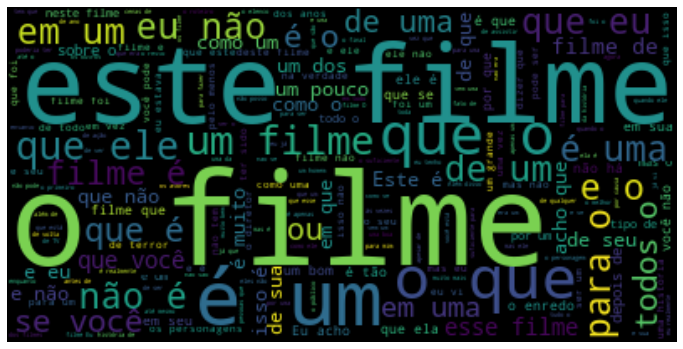

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
plt.axis("off")
plt.imshow(nuvem_palavras, interpolation="bilinear")
plt.show()

Percebe-se que usando todas as palavras do _corpus_ obtemos uma nuvem com diversas palavras sem muito importância semântica, ou seja, importantes para entender o sentimento do comentário.

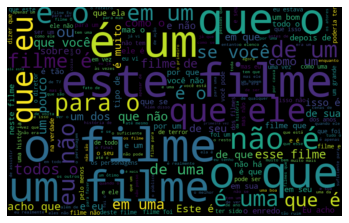

In [ ]:
# Word Cloud - Otimização
wc_dict = dict(
    width=800,
    height=500,
    max_font_size=110
    )

nuvem_palavras = WordCloud(**wc_dict)
nuvem_palavras.generate(corpus_unido)

# plt.figure(figsize=(10,7))
plt.axis("off")
plt.imshow(nuvem_palavras, interpolation="bilinear")
plt.show()

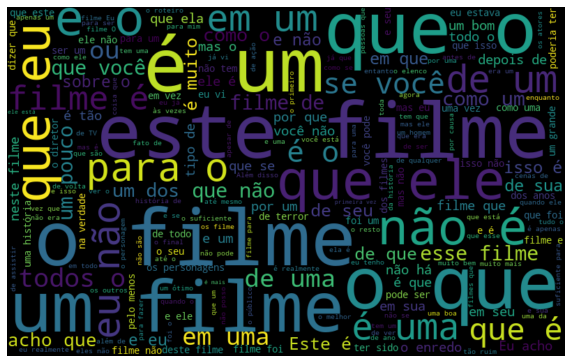

In [ ]:
plt.figure(figsize=(10,7))
plt.axis("off")
plt.imshow(nuvem_palavras, interpolation="bilinear")
plt.show()

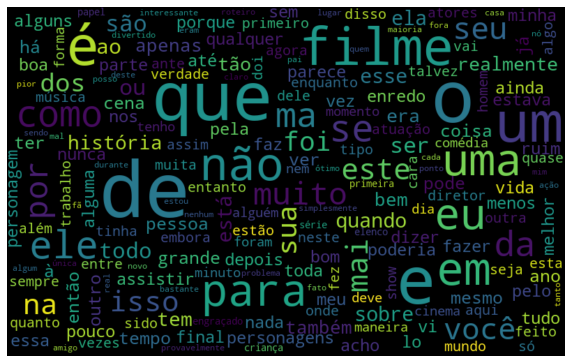

In [ ]:
# Word Cloud - Otimização
wc_dict = dict(
    width=800,
    height=500,
    max_font_size=110,
    collocations=False
    )

nuvem_palavras = WordCloud(**wc_dict)
nuvem_palavras.generate(corpus_unido)

plt.figure(figsize=(10,7))
plt.axis("off")
plt.imshow(nuvem_palavras, interpolation="bilinear")
plt.show()

Com esta imagem, sem a representação dos bigramas, já podemos obteralguns _insights_ sobre quais palavras não possuem relevância semântica nos comentários.



In [ ]:
%%capture
# https://github.com/googlefonts

!wget https://github.com/googlefonts/opensans/raw/main/fonts/ttf/OpenSans-Regular.ttf
!wget https://github.com/googlefonts/opensans/raw/main/fonts/ttf/OpenSans-CondensedExtraBold.ttf

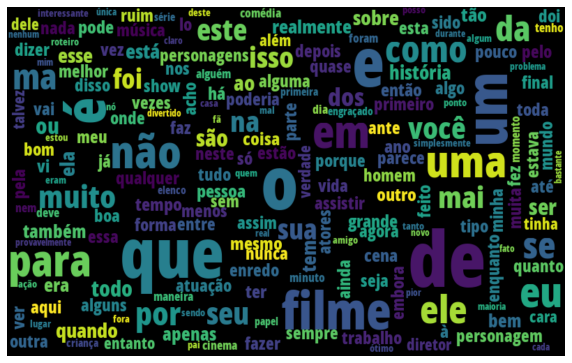

In [ ]:
# Word Cloud - Otimização
wc_dict = dict(
    width=800,
    height=500,
    max_font_size=110,
    collocations=False,
    font_path='/content/OpenSans-CondensedExtraBold.ttf'
    )

nuvem_palavras = WordCloud(**wc_dict)
nuvem_palavras.generate(corpus_unido)

plt.figure(figsize=(10,7))
plt.axis("off")
plt.imshow(nuvem_palavras, interpolation="bilinear")
plt.show()

### <h3>Separação de Negativo e Positico</h3>

Para facilitar a interpretação das palavras mais importantes em cada grupo podemos separar nuvem para cada um deles.

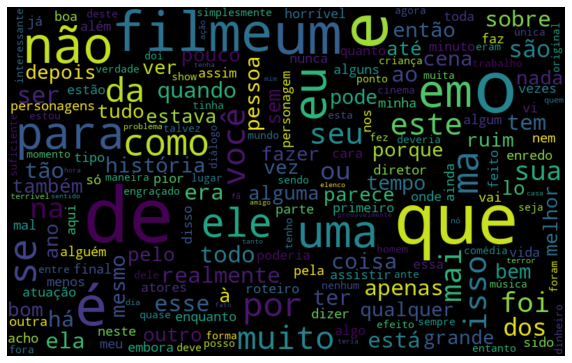

In [ ]:
def nuvem_palavras_neg(texto, coluna_texto, ):
    texto_negativo = texto.query("sentiment == 'neg'")
    corpus_unido = ' '.join([texto for texto in texto_negativo[coluna_texto]])

    # Word Cloud - Otimização
    wc_dict = dict(
        width=800,
        height=500,
        max_font_size=110,
        collocations=False,
        # font_path='/content/OpenSans-CondensedExtraBold.ttf'
        )

    nuvem_palavras = WordCloud(**wc_dict)
    nuvem_palavras.generate(corpus_unido)

    plt.figure(figsize=(10,7))
    plt.axis("off")
    plt.imshow(nuvem_palavras, interpolation="bilinear")
    plt.show()

nuvem_palavras_neg(resenha, 'text_pt')

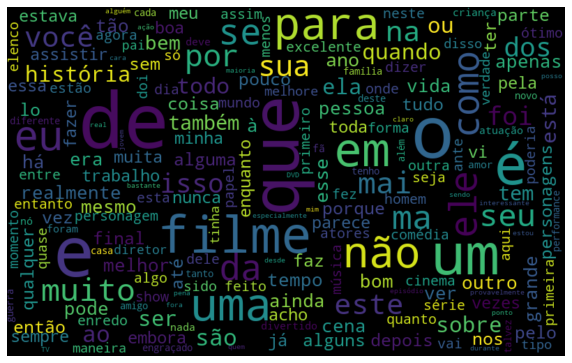

In [ ]:
def nuvem_palavras_pos(texto, coluna_texto, ):
    texto_positivo = texto.query("sentiment == 'pos'")
    corpus_unido = ' '.join([texto for texto in texto_positivo[coluna_texto]])

    # Word Cloud - Otimização
    wc_dict = dict(
        width=800,
        height=500,
        max_font_size=110,
        collocations=False,
        # font_path='/content/OpenSans-CondensedExtraBold.ttf'
        )

    nuvem_palavras = WordCloud(**wc_dict)
    nuvem_palavras.generate(corpus_unido)

    plt.figure(figsize=(10,7))
    plt.axis("off")
    plt.imshow(nuvem_palavras, interpolation="bilinear")
    plt.show()

nuvem_palavras_pos(resenha, 'text_pt')

## Exploração - Tokenização

O NLTK é uma biblioteca muito importante para o PLN, trazendo recursos de uso frequênte, além de capacidade de entender diversos idiomas.

<h3>Frequência de Frases</h3>

In [ ]:
# Primeiro teste de cálculo de frequencia
import nltk

frases = ["Assisti um filme ótimo", "Assisti um filme ruim"]

frequencia = nltk.FreqDist(frases)
frequencia

FreqDist({'Assisti um filme ruim': 1, 'Assisti um filme ótimo': 1})

<h3>Tokens</h3>

No exemplo anterior, o cálculo de frequencia ocorreu para cada frase. No entanto, desejamos a frequência das palavras ao invés das frases. Esse processo de separação das palavras é conhecido como _tokenização_.

In [ ]:
# Primeiro teste de tokenização
from nltk import tokenize

frase = "Bem vindo ao mundo do PLN!"

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)

print(token_frase)

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN!']


<h3>Aplicação no caso de comentários</h3>

A tokenização é o processo de receber um texto e separar suas palavras ou pontuação de acordo com um tipo de separação específica, gerando os chamados tokens, que são as partes segregadas daquele texto. Nesta aula usamos como separador o espaço em branco, mas temos outras formas de separar nosso texto.

In [ ]:
import nltk
from nltk import tokenize

# Tokenização
token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(corpus_unido)

# Frequencia
frequencia = nltk.FreqDist(token_frase)

In [ ]:
# Representação do Corpus
print(frequencia)

df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()), 'Frequência': list(frequencia.values())})

# df_frequencia.sort_values('Frequência', ascending=False)[:20]
df_frequencia.nlargest(columns='Frequência', n=15)

<FreqDist with 348285 samples and 10917477 outcomes>


,Palavra,Frequência
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


## Exploração - Pareto

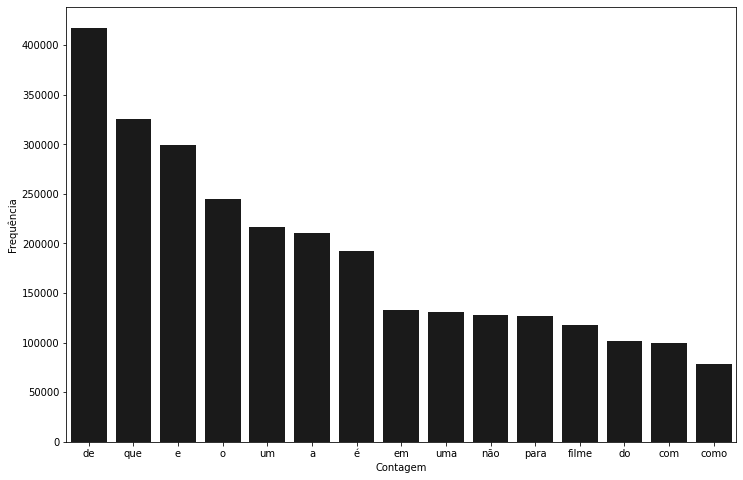

In [ ]:
import seaborn as sns

df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()), 'Frequência': list(frequencia.values())})

plt.figure(figsize=(12,8))
ax = sns.barplot(
    data = df_frequencia.nlargest(columns='Frequência', n=15), 
    x='Palavra', y='Frequência',
    color='0.1')
ax.set(xlabel='Contagem')
plt.show()

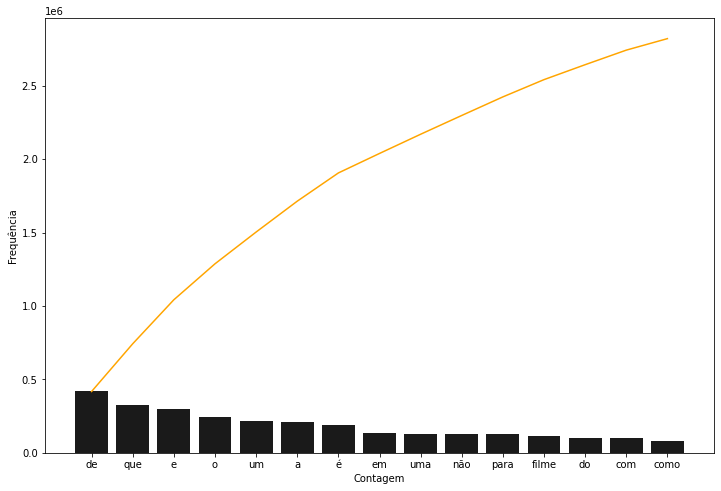

In [ ]:
# Gráfico de Pareto Absoluto
import seaborn as sns

df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()), 'Frequência': list(frequencia.values())})
df_frequencia = df_frequencia.nlargest(columns='Frequência', n=15)

plt.figure(figsize=(12,8))
ax = sns.barplot(
    data = df_frequencia, 
    x='Palavra', y='Frequência',
    color='0.1')

# Acumulado
df_frequencia['Frequência_acumulada'] = df_frequencia['Frequência'].cumsum()
sns.lineplot(
    data=df_frequencia,
    x='Palavra', y='Frequência_acumulada',
    color='orange', ax=ax)

ax.set(xlabel='Contagem')
plt.show()

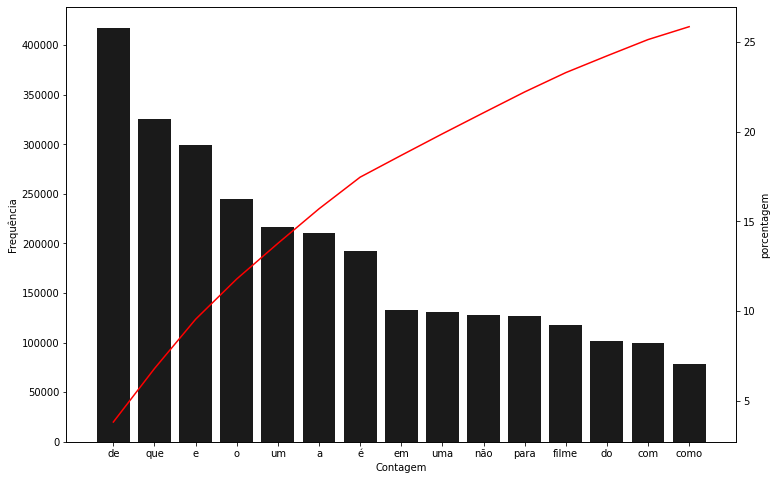

In [ ]:
# Gráfico de Pareto Absoluto
import seaborn as sns

df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()), 'Frequência': list(frequencia.values())})
total = df_frequencia['Frequência'].sum()  # acumulada global
df_frequencia = df_frequencia.nlargest(columns='Frequência', n=15)

# total = df_frequencia['Frequência'].sum()  # acumulada da seleção 
df_frequencia['porcentagem'] = df_frequencia['Frequência'].cumsum() / total * 100

plt.figure(figsize=(12,8))
ax = sns.barplot(
    data = df_frequencia, 
    x='Palavra', y='Frequência',
    color='0.1')
# Eixo duplo
ax2 = ax.twinx()
sns.lineplot(data=df_frequencia, x='Palavra', y='porcentagem', color='red', sort=False, ax=ax2)


ax.set(xlabel='Contagem')
plt.show()

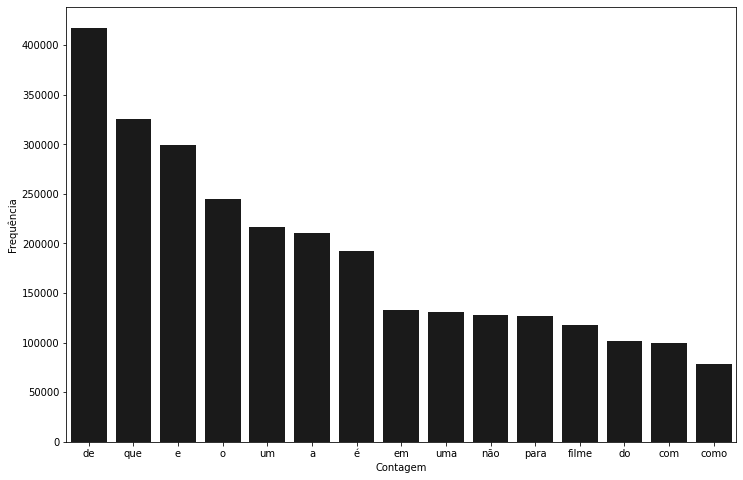

In [ ]:
import seaborn as sns
import nltk
from nltk import tokenize

def pareto(df, coluna_texto, quantidade):
    corpus_unido = ' '.join([texto for texto in df[coluna_texto]])
    # Tokenização
    token_espaco = tokenize.WhitespaceTokenizer()
    token_frase = token_espaco.tokenize(corpus_unido)
    # Frequencia
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()), 'Frequência': list(frequencia.values())})

    plt.figure(figsize=(12,8))
    df_frequencia = df_frequencia.nlargest(columns='Frequência', n=quantidade)

    ax = sns.barplot(
        data = df_frequencia, 
        x='Palavra', y='Frequência',
        color='0.1')
    ax.set(xlabel='Contagem')
    plt.show()

pareto(resenha, 'text_pt', 15)

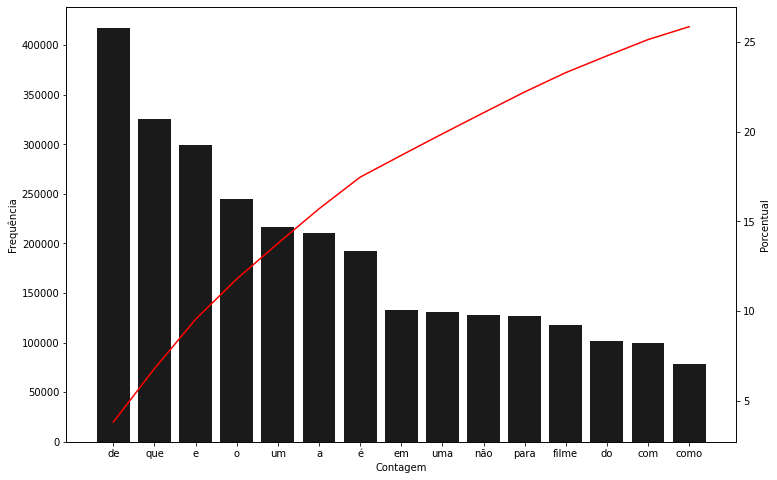

In [ ]:
import seaborn as sns
import nltk
from nltk import tokenize

def pareto(df, coluna_texto, quantidade):
    # Corpus
    corpus_unido = ' '.join([texto for texto in df[coluna_texto]])

    # Tokenização
    token_espaco = tokenize.WhitespaceTokenizer()
    token_frase = token_espaco.tokenize(corpus_unido)
    
    # Frequencia
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()), 'Frequência': list(frequencia.values())})
    total = df_frequencia['Frequência'].sum()

    # Gráfico
    plt.figure(figsize=(12,8))
    df_frequencia = df_frequencia.nlargest(columns='Frequência', n=quantidade)  # recorte

    # Barras
    ax = sns.barplot(
        data = df_frequencia, 
        x='Palavra', y='Frequência',
        color='0.1')
    
    # Acumulado
    df_frequencia['Porcentual'] = df_frequencia['Frequência'].cumsum()/total*100
    ax2 = ax.twinx()
    sns.lineplot(
        data=df_frequencia,
        x='Palavra', y='Porcentual',
        color='orange', ax=ax2)

    ax.set(xlabel='Contagem')
    plt.show()

pareto(resenha, 'text_pt', 15)

## Tratamento - Stop Words

Remoção de palavras que não possuem importância semanticamente para o nosso estudo de sentimento dos comentários.

In [ ]:
# STOP WORDS - Palavras irrelevantes
import nltk
nltk.download('stopwords')

palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')
palavras_irrelevantes

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

Remoção de palavras que pertecem à lista de stopwords.

In [ ]:
# Tratamento de Stopwords
frases_processadas = []
for opiniao in resenha['text_pt']:
    nova_frase = []
    palavras_texto = tokenize.WhitespaceTokenizer().tokenize(opiniao)  # tokenização da opinião
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frases_processadas.append(' '.join(nova_frase))

In [ ]:
resenha['tratamento_1'] = frases_processadas
resenha.sample(5)

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
14423,14425,Sophisticated sex comedies are always difficul...,Comédias sexuais sofisticadas são sempre difíc...,pos,1,Comédias sexuais sofisticadas sempre difíceis ...
18111,18113,"this is another good western,which i enjoyed.i...","este é outro bom faroeste, que eu apreciei. nã...",pos,1,"outro bom faroeste, apreciei. épico nada, bom ..."
9769,9771,I really seldom give either one or ten stars t...,Eu raramente dou uma ou dez estrelas para qual...,neg,0,"Eu raramente dou dez estrelas qualquer filme, ..."
33081,33083,I saw this cinematic wretchedness in a dollar ...,Eu vi essa miséria cinematográfica em um teatr...,neg,0,Eu vi miséria cinematográfica teatro dólar ami...
25168,25170,Director Kevin Connor and wannabe action-hero ...,O diretor Kevin Connor e o aspirante a herói d...,neg,0,O diretor Kevin Connor aspirante herói ação / ...


In [ ]:
classificar_texto(resenha, 'tratamento_1', 'classificacao', bag_of_words)

CPU times: user 6.28 s, sys: 50.9 ms, total: 6.33 s
Wall time: 6.34 s


0.6583097452486858

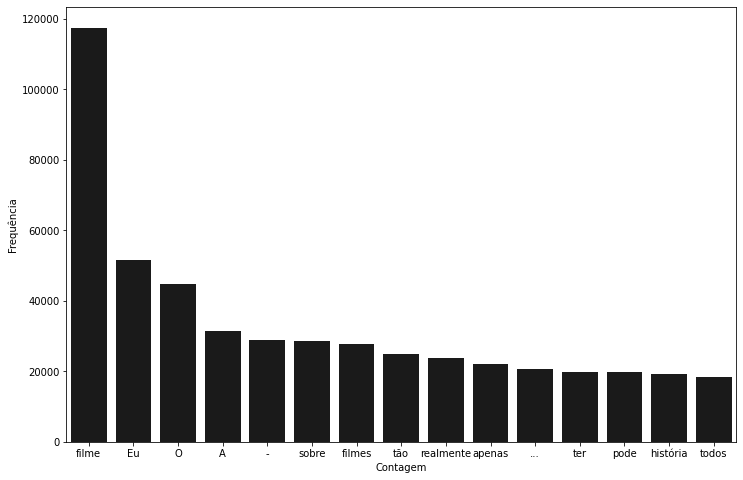

In [ ]:
pareto(resenha, 'tratamento_1', 15)

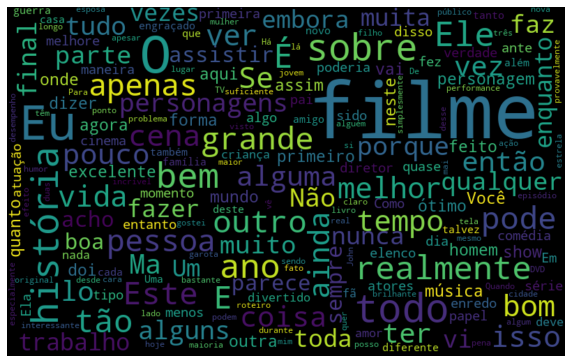

In [ ]:
nuvem_palavras_pos(resenha, 'tratamento_1')